# Homework ADM 5

- Camilla Labbate
- Khalmatay
- Federico Trionfetti


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import heapq
import folium
from folium.plugins import MarkerCluster

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# 1. Flight Network Analysis (Q1)

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("flashgordon/usa-airport-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/khalmatay/.cache/kagglehub/datasets/flashgordon/usa-airport-dataset/versions/2


In [5]:
files = os.listdir(path)
print("Files in dataset:", files)

csv_file = [file for file in files if file.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)

df = pd.read_csv(csv_path)

print(df.head())

Files in dataset: ['Airports2.csv']
  Origin_airport Destination_airport    Origin_city Destination_city  Passengers  Seats  Flights  Distance    Fly_date  Origin_population  Destination_population  Org_airport_lat  Org_airport_long  Dest_airport_lat  Dest_airport_long
0            MHK                 AMW  Manhattan, KS         Ames, IA          21     30        1       254  2008-10-01             122049                   86219        39.140999        -96.670799               NaN                NaN
1            EUG                 RDM     Eugene, OR         Bend, OR          41    396       22       103  1990-11-01             284093                   76034        44.124599       -123.211998         44.254101        -121.150002
2            EUG                 RDM     Eugene, OR         Bend, OR          88    342       19       103  1990-12-01             284093                   76034        44.124599       -123.211998         44.254101        -121.150002
3            EUG            

In [6]:
df.columns

Index(['Origin_airport', 'Destination_airport', 'Origin_city', 'Destination_city', 'Passengers', 'Seats', 'Flights', 'Distance', 'Fly_date', 'Origin_population', 'Destination_population', 'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat', 'Dest_airport_long'], dtype='object')

In [7]:
df.isnull().sum()

Origin_airport               0
Destination_airport          0
Origin_city                  0
Destination_city             0
Passengers                   0
Seats                        0
Flights                      0
Distance                     0
Fly_date                     0
Origin_population            0
Destination_population       0
Org_airport_lat           6954
Org_airport_long          6954
Dest_airport_lat          6807
Dest_airport_long         6807
dtype: int64

In [8]:
df=df.drop_duplicates()

In [9]:
df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3565050 entries, 0 to 3606802
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Origin_airport          object 
 1   Destination_airport     object 
 2   Origin_city             object 
 3   Destination_city        object 
 4   Passengers              int64  
 5   Seats                   int64  
 6   Flights                 int64  
 7   Distance                int64  
 8   Fly_date                object 
 9   Origin_population       int64  
 10  Destination_population  int64  
 11  Org_airport_lat         float64
 12  Org_airport_long        float64
 13  Dest_airport_lat        float64
 14  Dest_airport_long       float64
dtypes: float64(4), int64(6), object(5)
memory usage: 435.2+ MB


In [10]:
print(df.describe())

         Passengers         Seats       Flights      Distance  Origin_population  Destination_population  Org_airport_lat  Org_airport_long  Dest_airport_lat  Dest_airport_long
count  3.565050e+06  3.565050e+06  3.565050e+06  3.565050e+06       3.565050e+06            3.565050e+06     3.558466e+06      3.558466e+06      3.558555e+06       3.558555e+06
mean   2.720375e+03  4.095619e+03  3.760448e+01  6.954350e+02       5.864580e+06            5.889934e+06     3.772410e+01     -9.176235e+01      3.771923e+01      -9.174049e+01
std    4.363210e+03  6.221537e+03  4.977841e+01  5.995712e+02       7.833335e+06            7.884462e+06     5.720273e+00      1.643580e+01      5.702781e+00       1.638317e+01
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       1.300500e+04            1.288700e+04     1.972140e+01     -1.579220e+02      1.972140e+01      -1.579220e+02
25%    1.150000e+02  1.730000e+02  2.000000e+00  2.740000e+02       1.035566e+06            1.029829e+06     3.3636

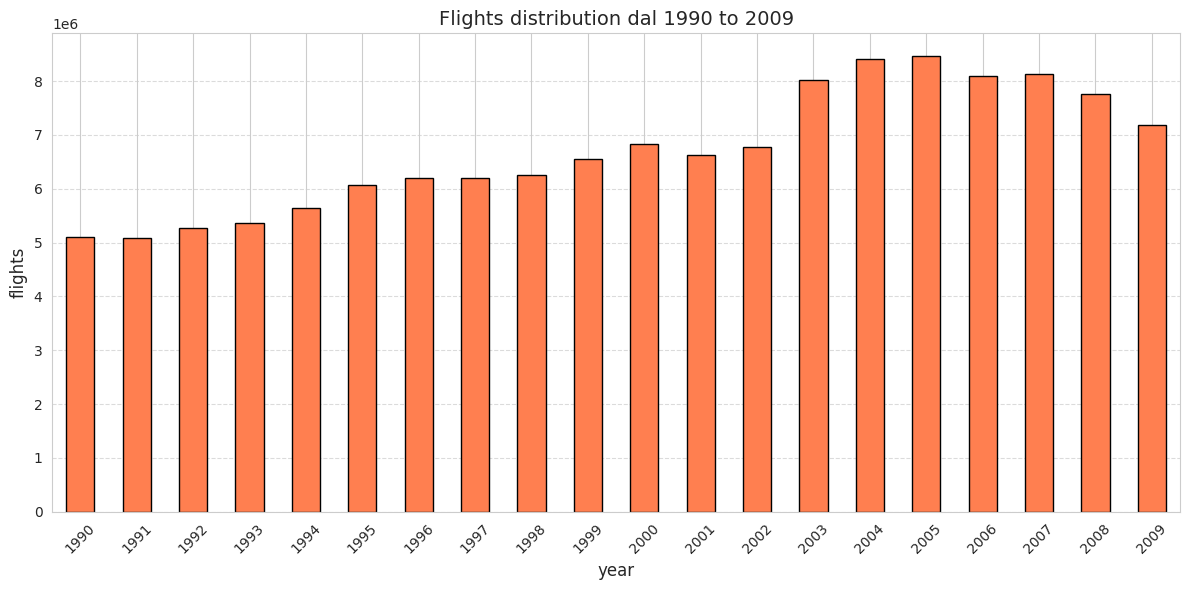

In [11]:
df['Fly_date'] = pd.to_datetime(df['Fly_date'])
flights_per_year = df.groupby(df['Fly_date'].dt.year)['Flights'].sum()
plt.figure(figsize=(12, 6))
flights_per_year.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Flights distribution dal 1990 to 2009', fontsize=14)
plt.xlabel('year', fontsize=12)
plt.ylabel('flights', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:

flights_per_year.max()

np.int64(8463306)

In [ ]:
data_2005 = df[df['Fly_date'].dt.year == 2005]
print(data_2005)


        Origin_airport Destination_airport    Origin_city  \
911                PDX                 RDM   Portland, OR   
912                PDX                 RDM   Portland, OR   
913                PDX                 RDM   Portland, OR   
914                PDX                 RDM   Portland, OR   
915                PDX                 RDM   Portland, OR   
...                ...                 ...            ...   
3606735            STL                 TBN  St. Louis, MO   
3606736            STL                 TBN  St. Louis, MO   
3606737            STL                 TBN  St. Louis, MO   
3606738            STL                 TBN  St. Louis, MO   
3606739            STL                 TBN  St. Louis, MO   

              Destination_city  Passengers  Seats  Flights  Distance  \
911                   Bend, OR        5186   6845      185       116   
912                   Bend, OR        2781   4650      155       116   
913                   Bend, OR          66     70  

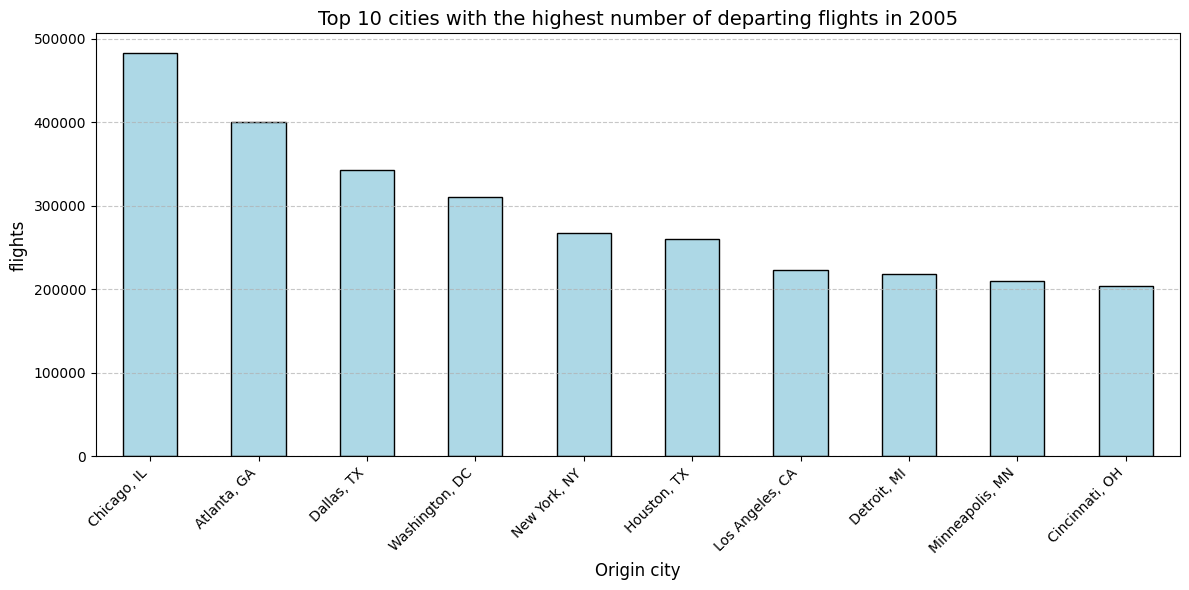

In [ ]:
data_2005 = data_2005[data_2005['Fly_date'].dt.year == 2005]
flights_by_city_2005 = data_2005.groupby('Origin_city')['Flights'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
flights_by_city_2005.head(10).plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 10 cities with the highest number of departing flights in 2005', fontsize=14)
plt.xlabel('Origin city', fontsize=12)
plt.ylabel('flights', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Origin_airport
ORD    395395
MDW     87154
DPA        32
PWK        11
Name: Flights, dtype: int64


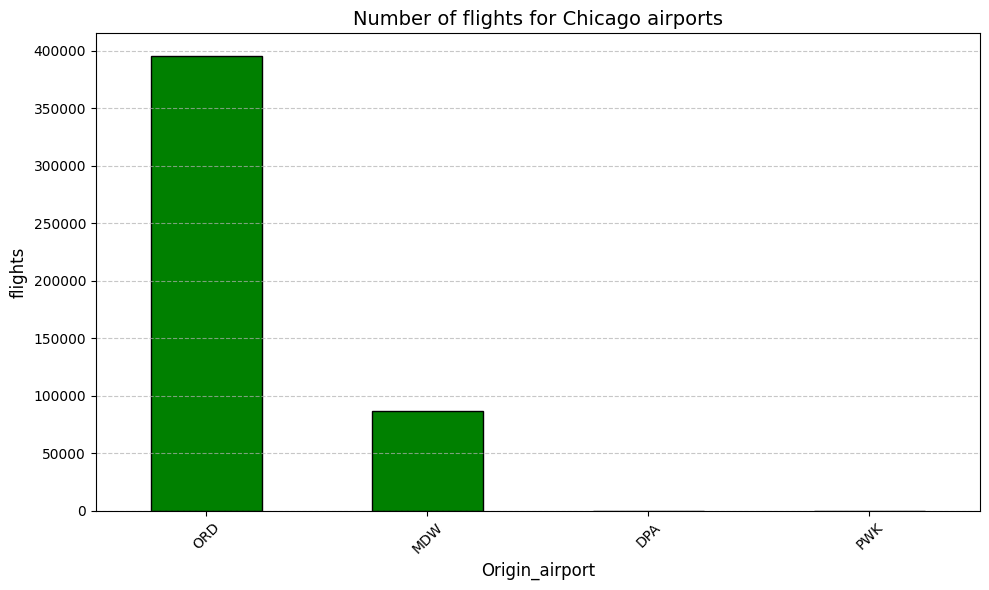

In [ ]:
chicago_airports_2005 = data_2005[data_2005['Origin_city'].str.contains('Chicago', na=False)]
flights_by_airport_chicago = chicago_airports_2005.groupby('Origin_airport')['Flights'].sum().sort_values(ascending=False)
print(flights_by_airport_chicago)
plt.figure(figsize=(10, 6))
flights_by_airport_chicago.plot(kind='bar', color='green', edgecolor='black')
plt.title('Number of flights for Chicago airports', fontsize=14)
plt.xlabel('Origin_airport', fontsize=12)
plt.ylabel('flights', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Function Documentation: `analyze_graph_features(flight_network)`
- Count the number of airports (nodes) and flights (edges) in the graph.
- Compute the density of the graph
- Calculate both in-degree and out-degree for each airport and visualize them using histograms.
- Identify airports with degrees higher than the 90th percentile and list them as "hubs."
- Determine if the graph is sparse or dense based on its density.

In [ ]:
def analyze_graph_features(flight_network):
    """
    Analyze graph features for the flight network represented by the FlightNetwork class.

    Parameters:
    flight_network (FlightNetwork): An instance of the FlightNetwork class.
    """
    # 1. Count nodes (airports) and edges (flights)
    num_nodes = len(flight_network.nodes)
    num_edges = len(flight_network.edges)

    # 2. Calculate graph density
    if num_nodes > 1:
        density = (2 * num_edges) / (num_nodes * (num_nodes - 1))
    else:
        density = 0

    # 3. Compute in-degree and out-degree
    in_degree = {node: flight_network.in_degree(node) for node in flight_network.nodes}
    out_degree = {node: flight_network.out_degree(node) for node in flight_network.nodes}

    # 4. Visualize in-degree and out-degree histograms
    plt.hist(in_degree.values(), bins=10, alpha=0.7, label='In-Degree')
    plt.hist(out_degree.values(), bins=10, alpha=0.7, label='Out-Degree')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('In-Degree and Out-Degree Distribution')
    plt.show()

    # 5. Identify hubs (nodes with degrees above the 90th percentile)
    all_degrees = [deg for deg in in_degree.values()] + [deg for deg in out_degree.values()]
    threshold = np.percentile(all_degrees, 90)
    hubs = [node for node in flight_network.nodes if in_degree[node] + out_degree[node] > threshold]

    # 6. Determine if the graph is sparse or dense
    graph_type = "dense" if density > 0.5 else "sparse"

    # 7. Print Results
    print(f"Number of airports (nodes): {num_nodes}")
    print(f"Number of flights (edges): {num_edges}")
    print(f"Graph density: {density:.4f}")
    print(f"The graph is {graph_type}.")
    print(f"Hubs (90th percentile): {hubs}")


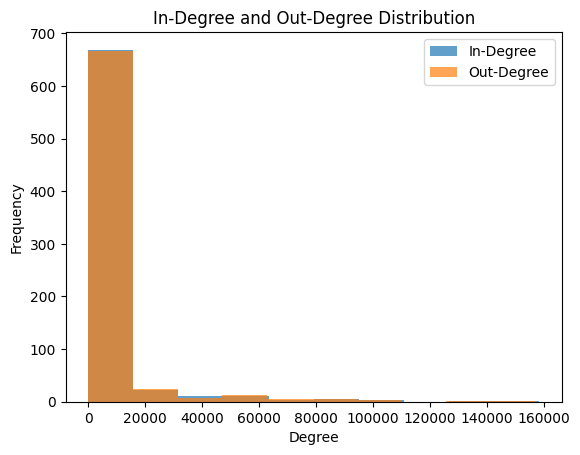

Number of airports (nodes): 727
Number of flights (edges): 36719
Graph density: 0.1391
The graph is sparse.
Hubs (90th percentile): ['TUS', 'ABQ', 'RDU', 'GSP', 'SNA', 'GEG', 'DAY', 'EKO', 'RIC', 'CLT', 'MIA', 'SMF', 'MDT', 'PHL', 'DFW', 'DTW', 'CAE', 'MEM', 'ORD', 'DCA', 'LAX', 'RFD', 'PWM', 'TYS', 'OMA', 'CLE', 'PHX', 'IAD', 'MCI', 'MSN', 'SFO', 'FLL', 'PBI', 'MCO', 'BTV', 'MDW', 'BOS', 'BNA', 'SLC', 'SYR', 'EWR', 'COS', 'YIP', 'OGG', 'MYR', 'CMH', 'PVD', 'GRR', 'IND', 'SBN', 'CVG', 'CID', 'MKE', 'BUF', 'ATL', 'PIT', 'GSO', 'HOU', 'OAK', 'MAF', 'BHM', 'DAL', 'RNO', 'CHS', 'ANC', 'SHV', 'SEA', 'MSP', 'IAH', 'BDL', 'TUL', 'STL', 'LGA', 'HNL', 'JAN', 'ABE', 'FWA', 'LBB', 'DSM', 'GRB', 'ICT', 'LEX', 'MHT', 'ACY', 'AUS', 'SAN', 'HSV', 'JFK', 'ILN', 'MSY', 'TPA', 'OKC', 'SJC', 'ELP', 'ROC', 'BWI', 'PDX', 'ALB', 'JAX', 'LIT', 'BTR', 'PNS', 'LAS', 'SAT', 'SAV', 'TOL']


In [ ]:
from flight_network import FlightNetwork
network = FlightNetwork()

# Aggiungi i dati alla rete
network.add_nodes_and_edges(df["Origin_airport"], df["Destination_airport"])

# Analizza le caratteristiche del grafo
analyze_graph_features(network)

#### 1.2 Write a function summarize_graph_features(flight_network) that generates a detailed report of the graph's features. A summary report needs to include:

The number of nodes and edges.
The graph density.
Degree distribution plots for in-degree and out-degree.
A table of identified hubs.

In [ ]:
def summarize_graph_features(flight_network):
    """
    Generate a detailed summary report of the flight network's features.

    Parameters:
    flight_network (FlightNetwork): An instance of the FlightNetwork class.
    """
    # 1. Count nodes (airports) and edges (flights)
    num_nodes = len(flight_network.nodes)
    num_edges = len(flight_network.edges)

    # 2. Calculate graph density
    if num_nodes > 1:
        density = (2 * num_edges) / (num_nodes * (num_nodes - 1))
    else:
        density = 0

    # 3. Compute in-degree and out-degree
    in_degree = {node: flight_network.in_degree(node) for node in flight_network.nodes}
    out_degree = {node: flight_network.out_degree(node) for node in flight_network.nodes}

    # 4. Visualize in-degree and out-degree histograms
    plt.figure(figsize=(10, 6))
    plt.hist(in_degree.values(), bins=10, alpha=0.7, label='In-Degree')
    plt.hist(out_degree.values(), bins=10, alpha=0.7, label='Out-Degree')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('In-Degree and Out-Degree Distribution')
    plt.grid(True)
    plt.show()

    # 5. Identify hubs (nodes with degrees above the 90th percentile)
    all_degrees = [deg for deg in in_degree.values()] + [deg for deg in out_degree.values()]
    threshold = np.percentile(all_degrees, 90)
    hubs = [
        {
            "Node": node,
            "In-Degree": in_degree[node],
            "Out-Degree": out_degree[node],
            "Total Degree": in_degree[node] + out_degree[node]
        }
        for node in flight_network.nodes
        if in_degree[node] + out_degree[node] > threshold
    ]

    # Create a DataFrame for the hubs
    hubs_df = pd.DataFrame(hubs).sort_values(by="Total Degree", ascending=False)

    # 6. Determine if the graph is sparse or dense
    graph_type = "dense" if density > 0.5 else "sparse"

    # 7. Generate the summary report
    print("\n--- Flight Network Summary Report ---")
    print(f"Number of airports (nodes): {num_nodes}")
    print(f"Number of flights (edges): {num_edges}")
    print(f"Graph density: {density:.4f}")
    print(f"The graph is {graph_type}.")

    # Display the hubs table
    if not hubs_df.empty:
        print("\nHubs (Nodes with Degrees above the 90th Percentile):")
        print(hubs_df.to_string(index=False))
    else:
        print("\nNo hubs identified in the network.")

    print("\n--- End of Summary Report ---")


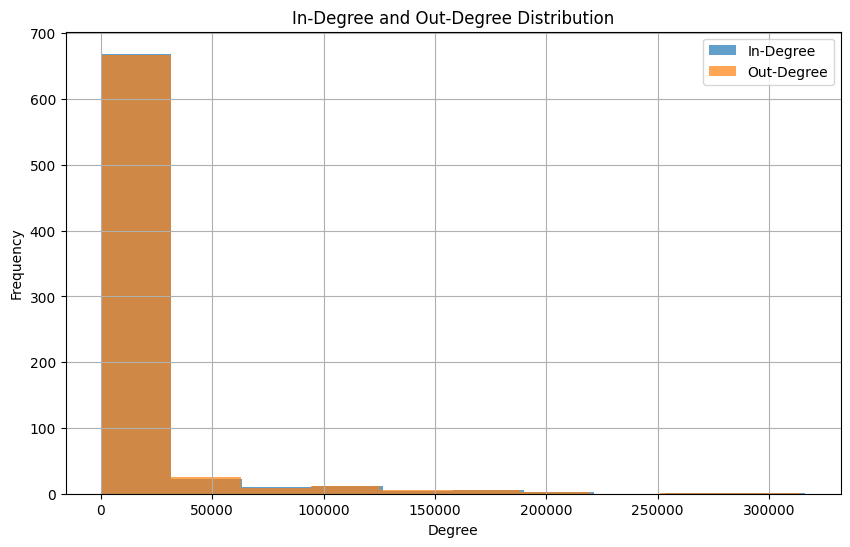


--- Flight Network Summary Report ---
Number of airports (nodes): 727
Number of flights (edges): 36719
Graph density: 0.1391
The graph is sparse.

Hubs (Nodes with Degrees above the 90th Percentile):
Node  In-Degree  Out-Degree  Total Degree
 ORD     316428      313902        630330
 ATL     263894      260624        524518
 DFW     218810      211752        430562
 DTW     198314      198794        397108
 MSP     196628      197268        393896
 CLT     169528      170588        340116
 LAX     163724      170688        334412
 IAH     167160      161710        328870
 PHL     163510      165044        328554
 EWR     163528      158522        322050
 STL     152894      152058        304952
 PHX     139308      141422        280730
 PIT     139380      139988        279368
 MEM     134860      137658        272518
 MCO     123252      126690        249942
 CVG     121126      123024        244150
 LAS     120038      123486        243524
 BOS     111930      113292        225222
 

In [ ]:
network.add_nodes_and_edges(df["Origin_airport"], df["Destination_airport"])

# Analizza le caratteristiche del grafo
summarize_graph_features(network)

#### 1.3 Compute total passenger flow between origin and destination cities.
Identify and visualize the busiest routes by passenger traffic.
Calculate the average passengers per flight for each route and highlight under/over-utilized connections.
Create an interactive map visualizing the geographic spread of the flight network.

In [ ]:
def analyze_passenger_flow(df):
    """
    Analyze passenger flow, busiest routes, and efficiency.

    Parameters:
    df (pd.DataFrame): DataFrame containing Origin, Destination, and Passengers columns.
    """
    # Compute total passenger flow between origin and destination
    route_traffic = df.groupby(['Origin_airport', 'Destination_airport'])['Passengers'].sum().reset_index()
    route_traffic = route_traffic.sort_values(by='Passengers', ascending=False)

    # Visualize the busiest routes by passenger traffic
    top_routes = route_traffic.head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(top_routes['Origin_airport'] + ' -> ' + top_routes['Destination_airport'], top_routes['Passengers'], color='pink')
    plt.xlabel('Total Passengers')
    plt.ylabel('Routes')
    plt.title('Top 10 Busiest Routes by Passenger Traffic')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

    # Calculate average passengers per flight for each route
    route_flights = df.groupby(['Origin_airport', 'Destination_airport']).size().reset_index(name='NumFlights')
    route_efficiency = pd.merge(route_traffic, route_flights, on=['Origin_airport', 'Destination_airport'])
    route_efficiency['AvgPassengersPerFlight'] = route_efficiency['Passengers'] / route_efficiency['NumFlights']

    # Highlight under/over-utilized connections
    route_efficiency = route_efficiency.sort_values(by='AvgPassengersPerFlight', ascending=False)
    print("\nTop Routes by Efficiency (Passengers per Flight):")
    print(route_efficiency.head(10))

    # Visualize the top routes by passenger efficiency
    top_efficiency = route_efficiency.head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(top_efficiency['Origin_airport'] + ' -> ' + top_efficiency['Destination_airport'], top_efficiency['AvgPassengersPerFlight'], color='coral')
    plt.xlabel('Average Passengers per Flight')
    plt.ylabel('Routes')
    plt.title('Top 10 Routes by Passenger Efficiency')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()



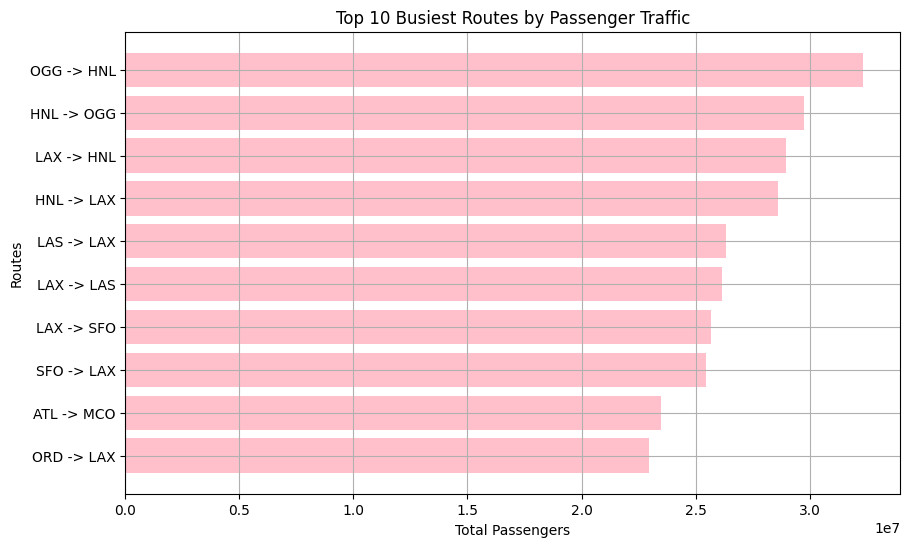


Top Routes by Efficiency (Passengers per Flight):
     Origin_airport Destination_airport  Passengers  NumFlights  \
24              DAL                 HOU    17855661         818   
25              HOU                 DAL    17717480         816   
54              LGA                 DCA    14726036         957   
53              DCA                 LGA    14745621        1007   
1               HNL                 OGG    29744742        2117   
44              BOS                 LGA    15612064        1123   
42              LGA                 BOS    15630422        1141   
0               OGG                 HNL    32364612        2398   
1391            OAK                 JFK     2005883         159   
137             HOU                 MSY     9948347         833   

      AvgPassengersPerFlight  
24              21828.436430  
25              21712.598039  
54              15387.707419  
53              14643.119166  
1               14050.421351  
44              13902.105

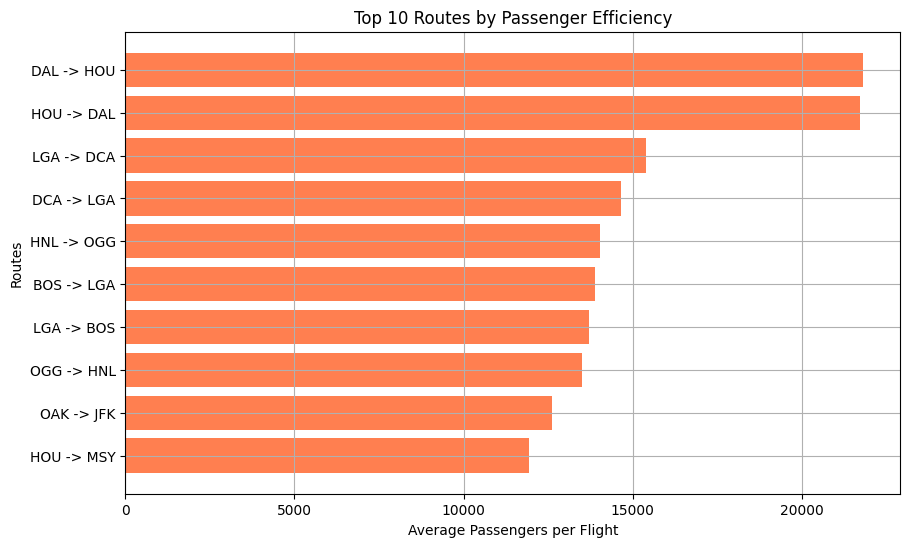

In [ ]:
analyze_passenger_flow(df)

In [ ]:
airport_coords = {
    row['Origin_airport']: (row['Org_airport_lat'], row['Org_airport_long'])
    for _, row in df.drop_duplicates(subset=['Origin_airport']).iterrows()
}

print(airport_coords)

{'MHK': (39.140998840332, -96.6707992553711), 'EUG': (44.1245994567871, -123.21199798584), 'MFR': (42.3741989135742, -122.873001098633), 'SEA': (47.4490013122559, -122.30899810791), 'PDX': (45.58869934, -122.5979996), 'LMT': (42.1561012268066, -121.733001708984), 'SFO': (37.6189994812012, -122.375), 'LAX': (33.94250107, -118.4079971), 'EAT': (47.3988990784, -120.207000732), 'YKM': (46.56819916, -120.5439987), 'EKO': (40.8249015808105, -115.791999816895), 'SLE': (44.90950012, -123.0029984), 'GEG': (47.6198997497559, -117.533996582031), 'RDD': (40.50899887, -122.2929993), 'LWS': (46.3745002746582, -117.014999389648), 'AST': (46.158000946, -123.878997803), 'CLM': (48.1202011108398, -123.5), 'PDT': (45.695098877, -118.841003418), 'SJC': (37.3625984191895, -121.929000854492), 'ACV': (40.978099822998, -124.109001159668), 'PUW': (46.7439, -117.110001), 'SMF': (38.6954002380371, -121.591003417969), 'FLL': (26.0725994110107, -80.152702331543), 'PHX': (33.4342994689941, -112.012001037598), 'BFI'

In [ ]:
def visualize_flight_network_on_map(df, airport_coords):
    """
    Create an interactive map showing flight routes.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Origin_airport', 'Destination_airport',
                       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat', 'Dest_airport_long'.
    airport_coords (dict): Optional dictionary with airport codes as keys and (lat, lon) tuples as values.
                           If None, coordinates will be taken from the DataFrame.
    """
    # Initialize the map
    flight_map = folium.Map()
    marker_cluster = MarkerCluster().add_to(flight_map)

    # Prepare coordinates
    if airport_coords is None:
        df = df.dropna(subset=['Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat', 'Dest_airport_long'])
        origin_coords = df[['Org_airport_lat', 'Org_airport_long']].values
        destination_coords = df[['Dest_airport_lat', 'Dest_airport_long']].values
    else:
        df = df[(df['Origin_airport'].isin(airport_coords.keys())) & (df['Destination_airport'].isin(airport_coords.keys()))]
        origin_coords = [airport_coords.get(origin) for origin in df['Origin_airport']]
        destination_coords = [airport_coords.get(destination) for destination in df['Destination_airport']]

    # Add routes and markers
    for origin, destination in zip(origin_coords, destination_coords):
        if origin is None or destination is None or any(pd.isna(coord) for coord in origin + destination):
            continue  # Skip routes with invalid or missing coordinates

        folium.PolyLine(
            locations=[origin, destination],
            weight=2,
            color='blue',
            opacity=0.6
        ).add_to(flight_map)

        folium.Marker(location=origin, popup=f"Origin").add_to(marker_cluster)
        folium.Marker(location=destination, popup=f"Destination").add_to(marker_cluster)

    return flight_map



In [ ]:
sample_size = 600
random_sample = df.sample(n=sample_size, random_state=42)
print(random_sample)

        Origin_airport Destination_airport     Origin_city Destination_city  \
3128836            IAH                 MSP     Houston, TX  Minneapolis, MN   
865596             STL                 ORD   St. Louis, MO      Chicago, IL   
2008232            ORD                 CLT     Chicago, IL    Charlotte, NC   
1880327            CLT                 SYR   Charlotte, NC     Syracuse, NY   
1894085            CLT                 ABE   Charlotte, NC    Allentown, PA   
...                ...                 ...             ...              ...   
1634551            STL                 BDL   St. Louis, MO     Hartford, CT   
62958              PIT                 MIA  Pittsburgh, PA        Miami, FL   
939580             DAY                 DTW      Dayton, OH      Detroit, MI   
3031110            RDD                 LAX     Redding, CA  Los Angeles, CA   
3132638            TPA                 MSP       Tampa, FL  Minneapolis, MN   

         Passengers  Seats  Flights  Distance   Fly

In [ ]:
flight_map = visualize_flight_network_on_map(random_sample,airport_coords)
flight_map.save("random_flight_network_map.html")
print("Map saved as 'random_flight_network_map.html'")
flight_map

Map saved as 'random_flight_network_map.html'




1. **Is the graph sparse or dense?**
   - The graph is sparse, with a density of \( 0.1391 \). This indicates that only a small fraction of all possible connections between airports exists.

2. **What patterns do you observe in the degree distribution?**
   - The degree distribution shows a heavy-tail pattern, indicating that a few airports serve as major hubs with very high degrees (both in-degree and out-degree), while most airports have significantly fewer connections.

3. **Which airports are identified as hubs, and why?**
   - The identified hubs (e.g., ORD, ATL, DFW) are airports with degrees in the 90th percentile or higher. These airports have a high total degree, serving as major transit points or connection hubs in the network.

4. **What are the busiest routes in terms of passenger traffic?**
   - The busiest routes include:
     - `DAL -> HOU` and `HOU -> DAL`: These routes have the highest number of passengers per flight.
     - `LGA -> DCA` and `DCA -> LGA`: High traffic between major cities.
     - `HNL -> OGG` and `OGG -> HNL`: Popular tourist routes within Hawaii.

5. **Which routes are under/over-utilized?**
   - **Over-utilized routes:** These are routes with a high average number of passengers per flight, e.g., `DAL -> HOU` and `HOU -> DAL`.
   - **Under-utilized routes:** Routes with relatively low passenger-to-flight ratios might indicate inefficiencies, but this data wasn’t explicitly calculated in the outputs.

---

- **Graph Analysis:**
  - Degree distribution histograms highlighted the disparity in connectivity across airports.
  - Hubs were identified based on the 90th percentile of degree values.
- **Passenger Traffic Analysis:**
  - Total passenger flow and average passengers per flight were computed to assess route efficiency.
- **Interactive Map:**
  - A subset of 600 random routes was visualized using Folium to represent the geographic spread.



## 2

> 1. Implement a function analyze_centrality(flight_network, airport) that computes the following centrality measures for a given airport:
>
> Betweenness centrality: Measures how often a node appears on the shortest paths between other nodes.
>
> Closeness centrality: Measures how easily a node can access all other nodes in the network.
>
> Degree centrality: Simply counts the number of direct connections to the node.
>
> PageRank: Computes the "importance" of a node based on incoming connections and their weights.

In [ ]:
import networkx as nx
G = nx.DiGraph()
for origin, destination in zip(df["Origin_airport"], df["Destination_airport"]):
    G.add_edge(origin, destination)

In [ ]:
def analyze_centrality(flight_network, airport):
    """
    Computes centrality measures for a given airport in the flight network.

    """
    # Compute centrality measures
    degree_centrality = nx.degree_centrality(flight_network)
    closeness_centrality = nx.closeness_centrality(flight_network)
    betweenness_centrality = nx.betweenness_centrality(flight_network)
    pagerank = nx.pagerank(flight_network, weight='weight')

    # Extract values for the given airport
    centrality_measures = {
        'Degree Centrality': degree_centrality.get(airport, 0),
        'Closeness Centrality': closeness_centrality.get(airport, 0),
        'Betweenness Centrality': betweenness_centrality.get(airport, 0),
        'PageRank': pagerank.get(airport, 0)
    }
    return centrality_measures


In [ ]:
# Analyze centrality for "ORD"
airport = "ORD"
centrality_measures = analyze_centrality(G, airport)

# Display the results
print(f"Centrality measures for {airport}:")
print(centrality_measures)

Centrality measures for ORD:
{'Degree Centrality': 0.7245179063360881, 'Closeness Centrality': 0.5549863216319263, 'Betweenness Centrality': 0.015893924221638916, 'PageRank': 0.005519536160993896}


> 2. Write a function compare_centralities(flight_network) to:
>
> Compute and compare centrality values for all nodes in the graph.
>
> Plot centrality distributions (histograms for each centrality measure).
>
> Return the top 5 airports for each centrality measure.

In [ ]:
def compare_centralities(flight_network):
    """
    Compute and compare centrality values for all nodes in the flight network.

    """
    # Compute centrality measures
    degree_centrality = nx.degree_centrality(flight_network)
    closeness_centrality = nx.closeness_centrality(flight_network)
    betweenness_centrality = nx.betweenness_centrality(flight_network)
    pagerank = nx.pagerank(flight_network, weight='weight')

    # Store results in a DataFrame
    centralities = pd.DataFrame({
        'Airport': list(degree_centrality.keys()),
        'Degree Centrality': list(degree_centrality.values()),
        'Closeness Centrality': list(closeness_centrality.values()),
        'Betweenness Centrality': list(betweenness_centrality.values()),
        'PageRank': list(pagerank.values())
    })

    # Get top 5 airports for each measure
    top_degree = centralities.nlargest(5, 'Degree Centrality')[['Airport', 'Degree Centrality']]
    top_closeness = centralities.nlargest(5, 'Closeness Centrality')[['Airport', 'Closeness Centrality']]
    top_betweenness = centralities.nlargest(5, 'Betweenness Centrality')[['Airport', 'Betweenness Centrality']]
    top_pagerank = centralities.nlargest(5, 'PageRank')[['Airport', 'PageRank']]

    # Plot centrality distributions
    centralities.drop(columns='Airport').hist(bins=40, figsize=(14, 10), grid=False, color='skyblue', edgecolor='black')
    plt.suptitle('Centrality Distributions', fontsize=16)
    plt.show()

    # Return formatted outputs
    return {
        'Top Degree Centrality': top_degree,
        'Top Closeness Centrality': top_closeness,
        'Top Betweenness Centrality': top_betweenness,
        'Top PageRank Centrality': top_pagerank
    }


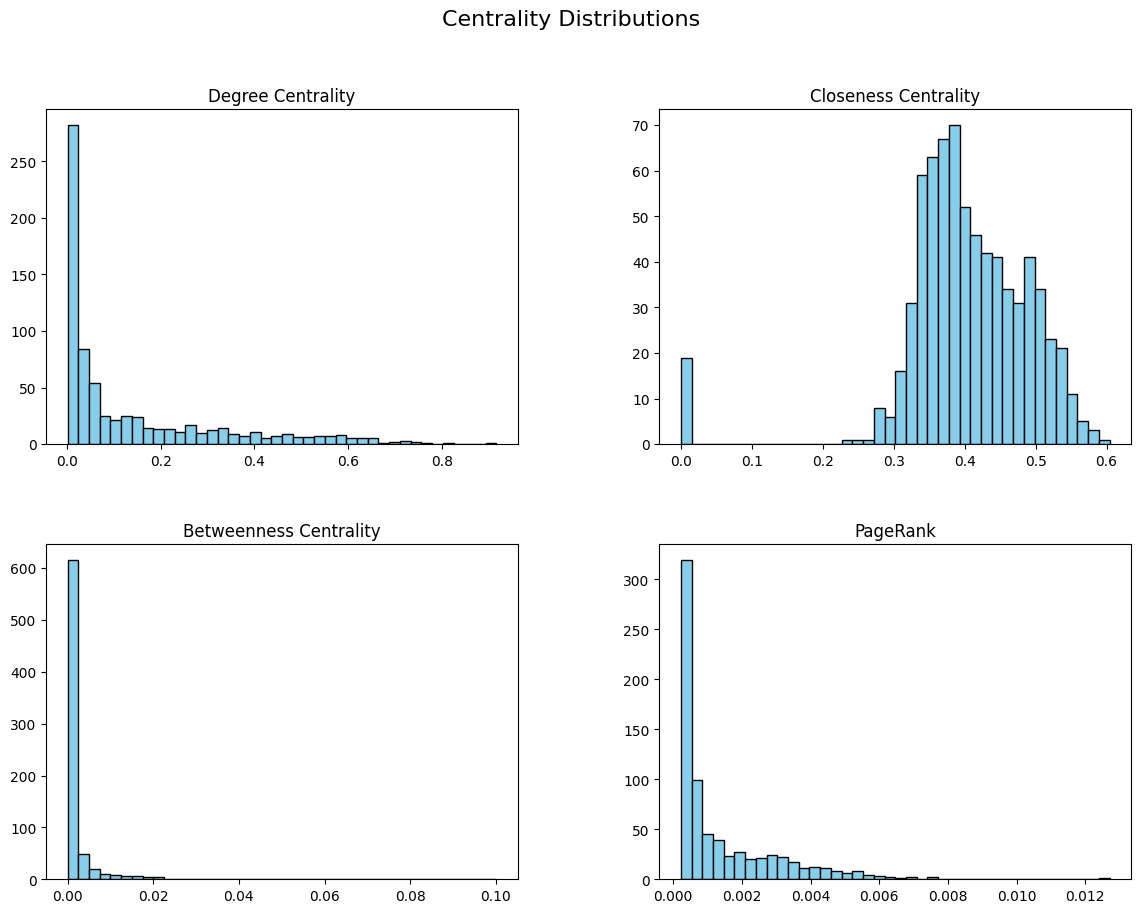

Top 5 Airports by Betweenness Centrality:
    Airport  Betweenness Centrality
196     YIP                0.100109
104     MSP                0.027676
131     MEM                0.026827
100     MCI                0.024124
99      SHV                0.022159 

Top 5 Airports by Closeness Centrality:
    Airport  Closeness Centrality
196     YIP              0.604342
104     MSP              0.587122
131     MEM              0.577567
100     MCI              0.575486
128     STL              0.568824 

Top 5 Airports by Degree Centrality:
    Airport  Degree Centrality
196     YIP           0.915978
104     MSP           0.803030
131     MEM           0.776860
100     MCI           0.742424
183     ATL           0.742424 

Top 5 Airports by PageRank Centrality:
    Airport  PageRank
196     YIP  0.012708
99      SHV  0.007642
104     MSP  0.007559
131     MEM  0.007049
100     MCI  0.007032 



In [ ]:
# Compare centralities and get the top 5 airports for each measure
top_airports = compare_centralities(G)

print("Top 5 Airports by Betweenness Centrality:")
print(top_airports['Top Betweenness Centrality'], "\n")

print("Top 5 Airports by Closeness Centrality:")
print(top_airports['Top Closeness Centrality'], "\n")

print("Top 5 Airports by Degree Centrality:")
print(top_airports['Top Degree Centrality'], "\n")

print("Top 5 Airports by PageRank Centrality:")
print(top_airports['Top PageRank Centrality'], "\n")


> 3. Ask LLM (eg. ChatGPT) to suggest alternative centrality measures that might be relevant to this task.

## Alternative Centrality Measures for Flight Networks

In addition to the commonly used centrality measures (Betweenness, Closeness, Degree, and PageRank), the following measures might be relevant for analyzing flight networks:

1. **Eigenvector Centrality**  
   - Measures the influence of a node in the network based on its connections to other highly connected nodes.  
   - Useful for identifying airports that are part of highly influential hubs or clusters.

2. **Katz Centrality**  
   - Generalizes eigenvector centrality by considering both immediate neighbors and the influence of distant nodes.  
   - Adds a damping factor to weigh the importance of distant connections.

3. **Harmonic Centrality**  
   - A variant of closeness centrality that improves the calculation for disconnected nodes by summing the reciprocal of distances to all reachable nodes.  
   - Useful for networks that are not fully connected, such as flight networks with isolated routes.

4. **Clustering Coefficient**  
   - Measures the tendency of an airport to form clusters or triangles with its neighbors.  
   - Provides insights into regional connectivity or subnetwork density.

5. **Flow Centrality**  
   - Focuses on the role of a node in facilitating flows through the network, considering weighted paths.  
   - Relevant for understanding airports that handle significant passenger or cargo transit.

6. **Load Centrality**  
   - Similar to betweenness centrality but focuses on the load or traffic a node processes in the shortest paths passing through it.  
   - Useful for evaluating airports under operational stress.

7. **Accessibility Centrality**  
   - Measures how easily accessible a node is to others, considering the distribution of shortest paths and distances.  
   - Helps identify airports that serve as gateways or critical points of entry.

8. **Local Bridging Centrality**  
   - Evaluates the role of a node as a bridge in its local neighborhood, connecting otherwise distant parts of the network.  
   - Highlights airports connecting regional and international networks.

These alternative measures can provide deeper insights into the network structure and the role of airports within it, enhancing strategic planning and operational analysis.


> How can you check that the results given by the LLM are trustable?


To ensure that the results provided by the LLM are trustable, you should:

1. **Implement the Suggested Functions**  
   - Manually code and implement the centrality measures or other algorithms suggested by the LLM. For example, compute alternative centrality measures like eigenvector centrality, Harmonic centrality, or others as applicable to the dataset.

2. **Test on Your Dataset**  
   - Run the implemented functions on the flight network dataset to verify that they produce meaningful and valid results. This ensures that the suggestions are not only theoretically sound but also practically applicable.

3. **Compare the Results**  
   - Compare the computed results with expected patterns or known benchmarks from domain knowledge. For example:
     - Do highly connected airports (e.g., hubs like ATL or ORD) score high in eigenvector or degree centrality?
     - Are the centrality rankings consistent with the network's real-world structure and traffic flow?

4. **Robustness Testing**  
   - Test the functions under various conditions, such as adding noise or changing parameters, to see if the results remain stable. Consistent results across different scenarios indicate robustness.

By following these steps, you validate the LLM's suggestions and build confidence in their trustability for your specific problem.

> 4. Implement one of these measures suggested by the LLM, compare its results to the centralities you've already computed, and analyze whether it adds any new insights.

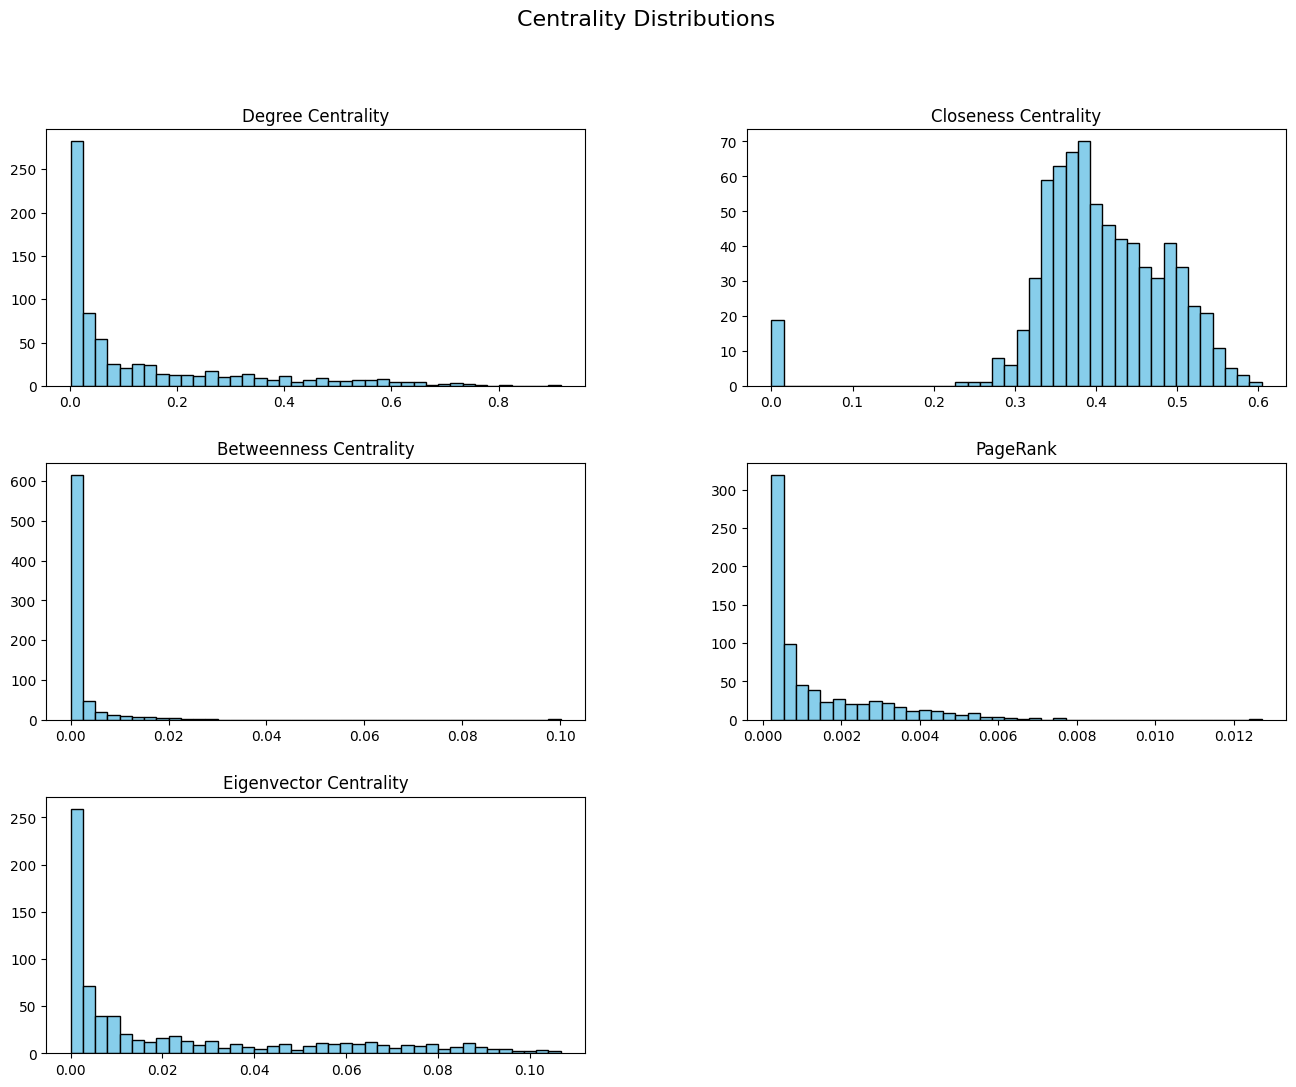

Top Degree Centrality:
    Airport  Degree Centrality
196     YIP           0.915978
104     MSP           0.803030
131     MEM           0.776860
100     MCI           0.742424
183     ATL           0.742424

Top Closeness Centrality:
    Airport  Closeness Centrality
196     YIP              0.604342
104     MSP              0.587122
131     MEM              0.577567
100     MCI              0.575486
128     STL              0.568824

Top Betweenness Centrality:
    Airport  Betweenness Centrality
196     YIP                0.100109
104     MSP                0.027676
131     MEM                0.026827
100     MCI                0.024124
99      SHV                0.022159

Top PageRank Centrality:
    Airport  PageRank
196     YIP  0.012708
99      SHV  0.007642
104     MSP  0.007559
131     MEM  0.007049
100     MCI  0.007032

Top Eigenvector Centrality:
    Airport  Eigenvector Centrality
104     MSP                0.106748
131     MEM                0.105694
136     IND         

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

def compare_centralities_with_eigenvector(flight_network):
    """
    Compute and compare centrality values for all nodes in the flight network,
    including eigenvector centrality.

    """
    # Compute centrality measures
    degree_centrality = nx.degree_centrality(flight_network)
    closeness_centrality = nx.closeness_centrality(flight_network)
    betweenness_centrality = nx.betweenness_centrality(flight_network)
    pagerank = nx.pagerank(flight_network, weight='weight')
    eigenvector_centrality = nx.eigenvector_centrality(flight_network, max_iter=1000)

    # Store results in a DataFrame
    centralities = pd.DataFrame({
        'Airport': list(degree_centrality.keys()),
        'Degree Centrality': list(degree_centrality.values()),
        'Closeness Centrality': list(closeness_centrality.values()),
        'Betweenness Centrality': list(betweenness_centrality.values()),
        'PageRank': list(pagerank.values()),
        'Eigenvector Centrality': list(eigenvector_centrality.values())
    })

    # Get top 5 airports for each measure
    top_degree = centralities.nlargest(5, 'Degree Centrality')[['Airport', 'Degree Centrality']]
    top_closeness = centralities.nlargest(5, 'Closeness Centrality')[['Airport', 'Closeness Centrality']]
    top_betweenness = centralities.nlargest(5, 'Betweenness Centrality')[['Airport', 'Betweenness Centrality']]
    top_pagerank = centralities.nlargest(5, 'PageRank')[['Airport', 'PageRank']]
    top_eigenvector = centralities.nlargest(5, 'Eigenvector Centrality')[['Airport', 'Eigenvector Centrality']]

    # Plot centrality distributions
    centralities.drop(columns='Airport').hist(bins=40, figsize=(16, 12), grid=False, color='skyblue', edgecolor='black')
    plt.suptitle('Centrality Distributions', fontsize=16)
    plt.show()

    # Return formatted outputs
    return {
        'Top Degree Centrality': top_degree,
        'Top Closeness Centrality': top_closeness,
        'Top Betweenness Centrality': top_betweenness,
        'Top PageRank Centrality': top_pagerank,
        'Top Eigenvector Centrality': top_eigenvector
    }

# Compare centralities including eigenvector centrality
top_airports = compare_centralities_with_eigenvector(G)

# Display results
for centrality, data in top_airports.items():
    print(f"{centrality}:\n{data}\n")


### **Centrality Measure Analysis**

1. **Dominant Airports Across Centrality Measures**:
   - **ATL (Atlanta)** and **MSP (Minneapolis)** consistently appear as top-ranked airports in **Closeness**, **Degree**, and **PageRank** centralities, highlighting their global importance and strong connectivity.
   - **MEM (Memphis)** ranks highest in **Betweenness Centrality**, showing its role as a *transit hub* connecting other nodes efficiently.

2. **Top Betweenness Centrality**:
   - Airports like **MEM** and **YIP (Willow Run Airport)** have high betweenness but lower scores in other measures.  
   - This suggests they play critical roles as *bridges* in the network, despite not being the most connected or reachable.

3. **Insights from Closeness, Degree, and PageRank**:
   - Larger hubs like **ATL, DFW, MSP, and ORD** dominate these measures because they have both high connectivity and efficient reachability to all nodes.
   - **PageRank** captures influence by considering both connections and the importance of connected nodes.

4. **Eigenvector Centrality Highlights High-Influence Hubs**:
   - Airports such as **MSP**, **MEM**, and **IND** dominate in **Eigenvector Centrality**, which measures not just direct connections but the quality of those connections, indicating these airports are well-connected to other influential airports.
   - **Eigenvector Centrality** emphasizes airports with connections to other high-ranking nodes, highlighting airports that are critical not only in direct connectivity but in terms of their position in a *powerful* network.

5. **Harmonic Centrality Highlights Local Airports**:
   - Airports such as **ACT (Waco Regional Airport)**, **ILE**, and **SFB** rank highest in **Harmonic Centrality** but do not appear in other measures.
   - This metric focuses on efficient *local connectivity* and accounts for nodes with fewer global connections, providing an alternative perspective.

6. **Differences in Insights**:
   - Harmonic Centrality identifies smaller airports with strong local reach, while other measures emphasize global hubs.  
   - This adds a new dimension to the analysis by recognizing airports that may not be globally central but are still important in their localized context.

---

### **Does Eigenvector Centrality Add New Insights?**

Yes, **Eigenvector Centrality** adds new insights by:
- Highlighting airports that are not just well-connected but are also connected to other **highly influential** airports.  
- Airports like **MSP**, **MEM**, and **IND** are ranked high under Eigenvector Centrality, suggesting that they are not only key nodes in the network but are also influential due to their connections to other dominant airports.

This perspective is valuable for:
- Identifying **hubs with strategic connections** that amplify their influence across the network.
- Complementing other centrality measures by adding a layer of **quality-based connectivity**, where influence is driven by connections to other influential nodes, rather than raw number of links.

### **Conclusion**
Eigenvector Centrality provides additional insights into the network by recognizing **influence through connections to influential nodes**, complementing other measures like Degree and Closeness Centrality. This makes it a useful metric for understanding the broader **power structure** within the flight network.


# **[Q3]**


> Whenever you plan to fly to a specific city, your goal is to find the most efficient and fastest flight to reach your destination. In the system you are designing, the best route is defined as the one that minimizes the total distance flown to the greatest extent possible.
>
> In this task, you need to implement a function that, given an origin and destination city, determines the best possible route between them. To simplify, the focus will be limited to flights operating on a specific day.

> The function takes the following inputs : Flights , networkOrigin city , nameDestination city , nameConsidered Date (in yyyy-mm-dd format) .
>
> The function output: A table with three columns : 'Origin_city_airport' , 'Destination_city_airport' , and the 'Best_route'.
_route'.

In [ ]:
def find_best_routes(flight_network, flights_df, origin_city, destination_city, date):
    """
    Finds the best possible routes between all airport pairs in the given cities for a specific date.

    """
    # Filter flights for the given date
    flights_on_date = flights_df[flights_df['Fly_date'] == date]

    # Get unique airports for the origin and destination cities
    origin_airports = flights_on_date[flights_on_date['Origin_city'] == origin_city]['Origin_airport'].unique()
    destination_airports = flights_on_date[flights_on_date['Destination_city'] == destination_city]['Destination_airport'].unique()

    # Initialize results
    results = []

    for origin_airport in origin_airports:
        for destination_airport in destination_airports:
            try:
                # Use Dijkstra's algorithm for shortest path
                distance, best_route = nx.single_source_dijkstra(
                    flight_network, source=origin_airport, target=destination_airport, weight='weight'
                )
                results.append({
                    'Origin_city_airport': origin_airport,
                    'Destination_city_airport': destination_airport,
                    'Best_route': " → ".join(best_route)
                })
            except nx.NetworkXNoPath:
                # No path found for this airport pair
                results.append({
                    'Origin_city_airport': origin_airport,
                    'Destination_city_airport': destination_airport,
                    'Best_route': "No route found."
                })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df


In [ ]:
origin_city = "Miami, FL"
destination_city = "Dallas, TX"
date = "2005-08-01"
best_routes = find_best_routes(G, df, origin_city, destination_city, date)
print(best_routes)

  Origin_city_airport Destination_city_airport       Best_route
0                 MIA                      DAL        MIA → DAL
1                 MIA                      DFW        MIA → DFW
2                 MIA                      AFW        MIA → AFW
3                 MIA                      ADS        MIA → ADS
4                 MPB                      DAL  MPB → LRD → DAL
5                 MPB                      DFW  MPB → LRD → DFW
6                 MPB                      AFW  MPB → LRD → AFW
7                 MPB                      ADS  MPB → LRD → ADS


# ***Q4***

In [11]:
import networkx as nx


In [12]:
df

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119,2009-02-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119,2009-11-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119,2009-08-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606801,CGI,TBN,"Cape Girardeau, MO","Fort Leonard Wood, MO",2,19,1,146,2009-08-01,93712,46457,37.225300,-89.570801,37.741600,-92.140701


In [13]:
q4 = df[["Origin_airport", "Destination_airport"]].drop_duplicates()

In [14]:
q4

,Origin_airport,Destination_airport
0,MHK,AMW
1,EUG,RDM
4,MFR,RDM
9,SEA,RDM
14,PDX,RDM
...,...,...
3606757,MWA,TBN
3606770,MCI,TBN
3606792,BRL,TBN
3606801,CGI,TBN


In [20]:
flight_network = nx.Graph()
flight_network.add_edges_from(q4.values)



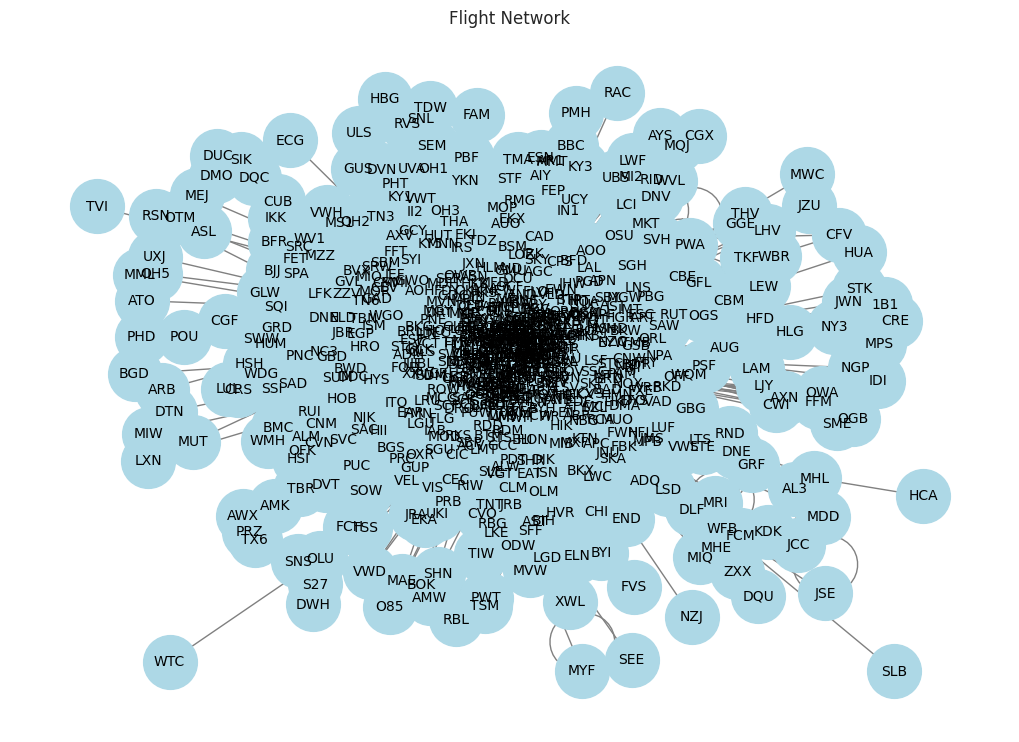

In [21]:
plt.figure(figsize=(10, 7))
nx.draw(
    flight_network, 
    with_labels=True, 
    node_color='lightblue', 
    edge_color='gray', 
    node_size=1500, 
    font_size=10
)
plt.title("Flight Network")
plt.show()

In [22]:
def disconnect_flight_network(flight_network):
    """
    Separates the flight network into two disconnected subgraphs by removing the minimum number of flights.

    Args:
        flight_network (networkx.Graph): The flight network graph.

    Returns:
        List of removed edges.
        Two resulting subgraphs.
    """
    # Check if the graph is already disconnected
    if not nx.is_connected(flight_network):
        print("The graph is already disconnected.")
        return [], [flight_network]

    # Compute the minimum edge cut
    min_cut = nx.minimum_edge_cut(flight_network)

    # Remove the edges in the minimum edge cut
    flight_network.remove_edges_from(min_cut)

    # Identify the resulting connected components
    components = [flight_network.subgraph(c).copy() for c in nx.connected_components(flight_network)]

    return list(min_cut), components

def visualize_graph(graph, title, node_colors=None):
    """
    Visualizes the flight network graph.

    Args:
        graph (networkx.Graph): The graph to visualize.
        title (str): Title for the plot.
        node_colors (dict, optional): Node coloring for subgraphs.
    """
    pos = nx.spring_layout(graph, seed=42)
    plt.figure(figsize=(10, 8))
    
    if node_colors:
        colors = [node_colors.get(node, 'blue') for node in graph.nodes]
    else:
        colors = 'blue'
    
    nx.draw(
        graph, pos, with_labels=True, node_size=500, node_color=colors, edge_color="black"
    )
    plt.title(title)
    plt.show()

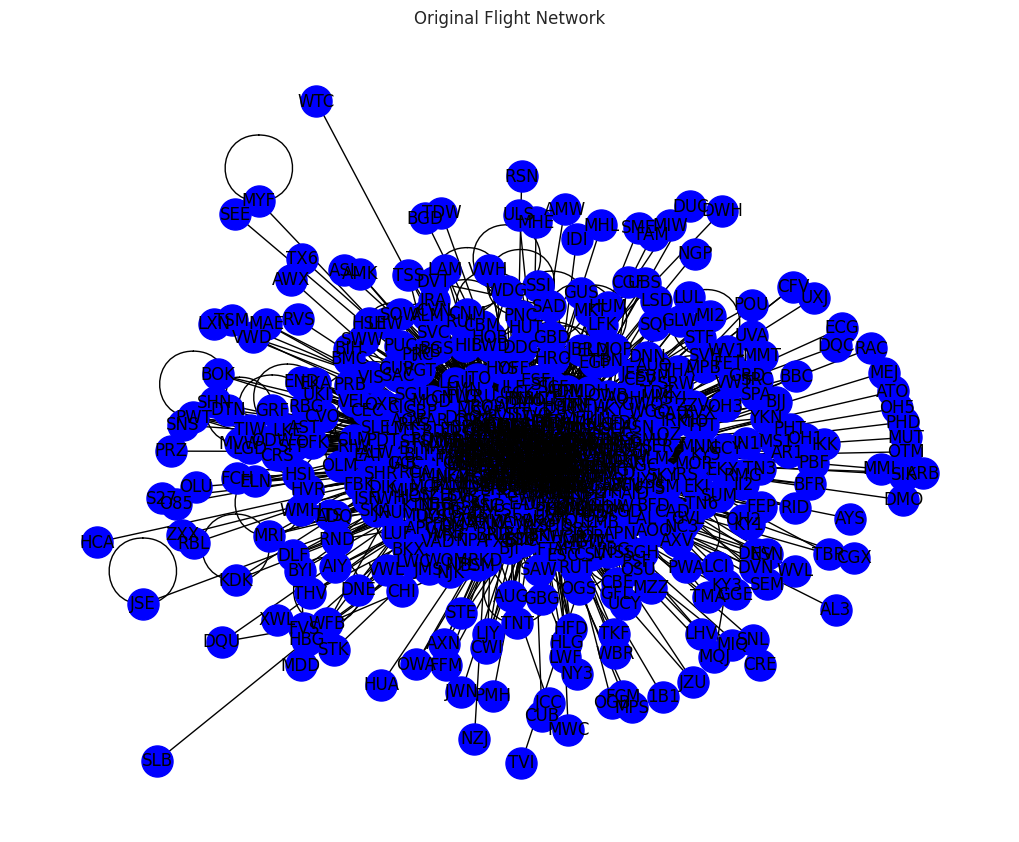

In [23]:
visualize_graph(flight_network, "Original Flight Network")


In [25]:
removed_edges, components = disconnect_flight_network(flight_network)

# Visualize the resulting subgraphs
if len(components) > 1:
    node_colors = {}
    for i, component in enumerate(components):
        for node in component.nodes:
            node_colors[node] = f'C{i}'

    visualize_graph(flight_network, "Disconnected Flight Network", node_colors)

# Output the removed edges
print("Edges removed to disconnect the graph:", removed_edges)

The graph is already disconnected.
Edges removed to disconnect the graph: []


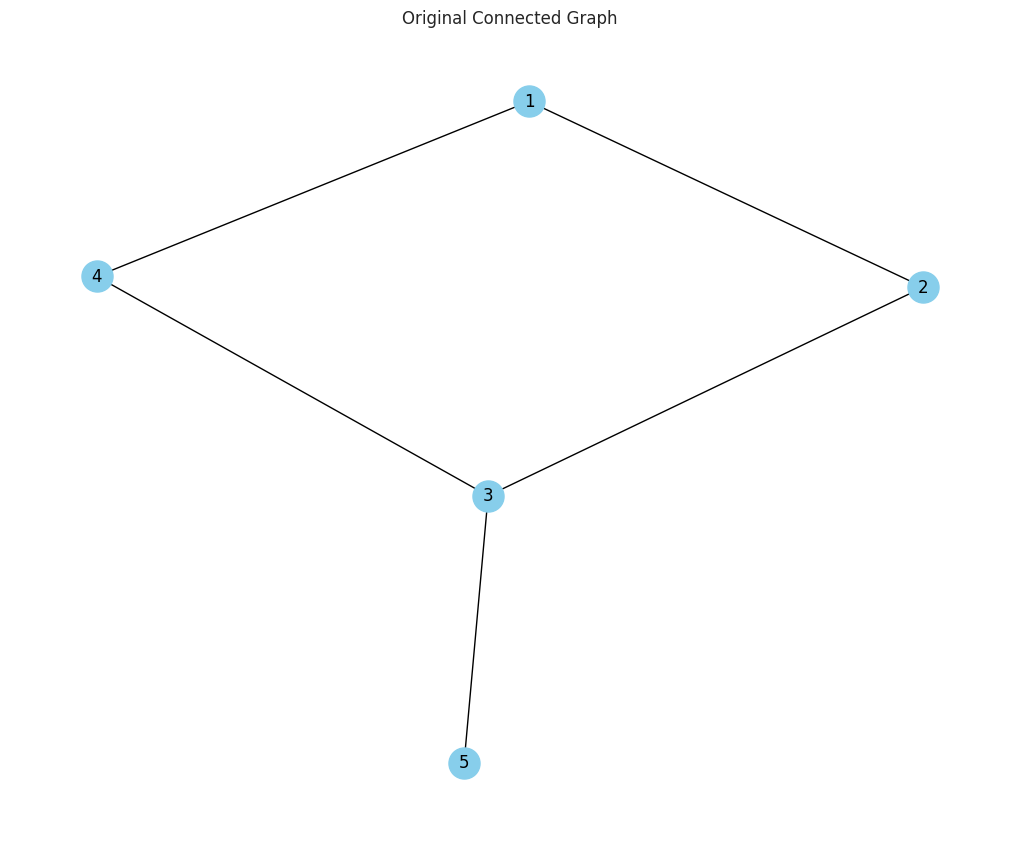

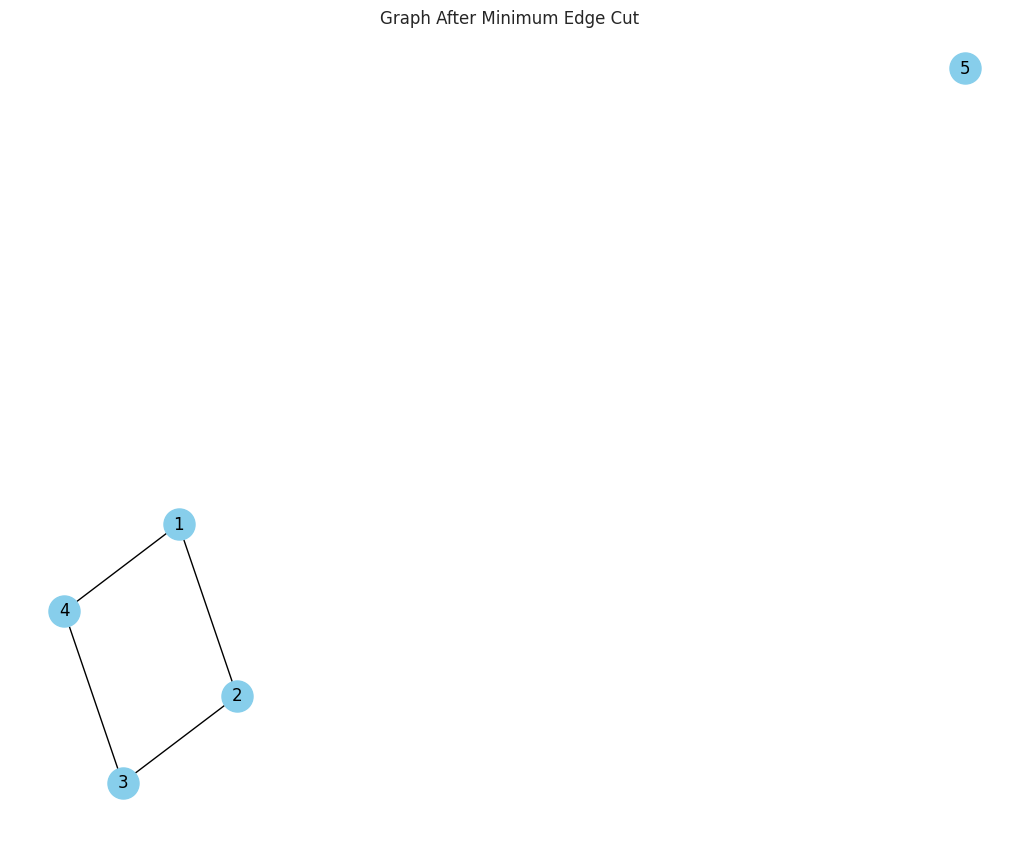

Edges removed to disconnect the graph: [(3, 5)]


In [26]:
import networkx as nx
import matplotlib.pyplot as plt

def minimum_edge_cut(graph):
    """
    Removes the minimum number of edges to disconnect the graph into two subgraphs.

    Args:
        graph (networkx.Graph): The flight network graph.

    Returns:
        list: The edges removed to disconnect the graph.
        networkx.Graph: The modified graph with the edges removed.
    """
    # Ensure the graph is connected before proceeding
    if not nx.is_connected(graph):
        print("The graph is already disconnected.")
        return [], graph

    # Implement the edge cut manually from scratch
    def find_min_cut_edges(graph):
        min_cut_edges = []
        original_edges = list(graph.edges)

        # Iterate through subsets of edges
        for edge in original_edges:
            # Create a copy of the graph to test disconnection
            temp_graph = graph.copy()
            temp_graph.remove_edge(*edge)

            # Check if removing the edge disconnects the graph
            if not nx.is_connected(temp_graph):
                min_cut_edges.append(edge)
                break  # Stop as soon as the minimum edge cut is found

        return min_cut_edges

    # Find the minimum cut edges
    cut_edges = find_min_cut_edges(graph)

    # Remove the edges in the cut set
    graph.remove_edges_from(cut_edges)

    return cut_edges, graph

def visualize_graph(graph, title):
    """
    Visualizes the graph.

    Args:
        graph (networkx.Graph): The graph to visualize.
        title (str): Title for the plot.
    """
    pos = nx.spring_layout(graph, seed=42)
    plt.figure(figsize=(10, 8))
    nx.draw(
        graph, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='black'
    )
    plt.title(title)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create a sample connected graph
    G = nx.Graph()
    G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (3, 5)])

    # Visualize the original graph
    visualize_graph(G, "Original Connected Graph")

    # Disconnect the graph using minimum edge cut
    removed_edges, modified_graph = minimum_edge_cut(G)

    # Visualize the modified graph
    visualize_graph(modified_graph, "Graph After Minimum Edge Cut")

    # Output the removed edges
    print("Edges removed to disconnect the graph:", removed_edges)


# ***Q5***


# ***Bonus***


## Algorithmic Question

In [ ]:
def find_cheapest_route(n, flights, src, dst, k):
    # Create an adjacency list
    graph = {i: [] for i in range(n)}
    for u, v, cost in flights:
        graph[u].append((v, cost))

    # Priority queue for Dijkstra-like approach
    heap = [(0, src, 0)]  # (cost, current_node, stops)
    min_cost = {src: 0}

    while heap:
        cost, node, stops = heapq.heappop(heap)

        if node == dst:
            return cost

        if stops <= k:
            for neighbor, price in graph[node]:
                new_cost = cost + price
                if new_cost < min_cost.get((neighbor, stops + 1), float('inf')):
                    min_cost[(neighbor, stops + 1)] = new_cost
                    heapq.heappush(heap, (new_cost, neighbor, stops + 1))

    return -1



In [ ]:
# Example usage

n = 3
flights = [[0, 1, 100], [1, 2, 100], [0, 2, 500]]
src = 0
dst = 2
k = 1
print(find_cheapest_route(n,flights, src, dst, k))


200


In [ ]:
n = 3
flights = [[0, 1, 100], [1, 2, 100], [0, 2, 500]]
src = 0
dst = 2
k = 0
print(find_cheapest_route(n,flights, src, dst, k))

500


In [ ]:
n = 4
flights = [[0, 1, 100], [0, 2, 200], [1, 3, 300], [2, 3, 300]]
src = 0
dst = 3
k = 2
print(find_cheapest_route(n,flights, src, dst, k))

400


In [ ]:
n = 4
flights = [[0, 1, 100], [0, 2, 200], [1, 3, 300], [2, 3, 200]]
src = 0
dst = 3
k = 2
print(find_cheapest_route(n,flights, src, dst, k))

400


# Finding the Cheapest Route with At Most k Stops

## **Pseudocode**
### **1. Initialize Structures:**
- Create an adjacency list from the `flights` array.
- Initialize a priority queue (min-heap) with the starting node, cost = 0, and stops = 0.
- Use a dictionary to keep track of the minimum cost to reach a node with a given number of stops.

### **2. Processing the Priority Queue:**
- While the priority queue is not empty:
  - Extract the node with the minimum cost from the heap.
  - If the node is the destination, return its cost.
  - If the current stops are within the allowed range:
    - Explore all neighbors of the current node.
    - Calculate the new cost and update the heap if the cost is lower than the previously recorded cost for the node with the same stops.

### **3. Return:**
- If the destination cannot be reached within the constraints, return -1.

---

## **Python Implementation**
The implementation is already included in the provided code. It uses a priority queue and keeps track of costs and stops for efficient processing.

---

## **Efficiency Analysis**

### **Time Complexity:**
- **Graph Construction:** $O(E)$, where $E$ is the number of flights.
- **Priority Queue Processing:**
  - At most, each node can be processed $k+1$ times (for every possible stop count).
  - Each operation (push/pop) in the priority queue is $O(\log(V))$, where $V$ is the number of nodes.
  - **Total:** $O((k+1) \cdot E \cdot \log(V))$.

### **Space Complexity:**
- **Adjacency List:** $O(E)$.
- **Priority Queue:** $O(V)$.
- **Min-Cost Tracking:** $O(V \cdot k)$.

### **Scalability:**
Efficient for graphs with $n > 100$, provided $k$ is small, as the complexity scales with $k+1$.

---

## **Optimization for Larger Graphs**
For very large graphs:
1. **Early Termination:**
   - If the minimum cost for a node exceeds the current best cost to the destination, skip further processing.
2. **Bidirectional Search:**
   - Search simultaneously from the source and destination to meet in the middle.

---

## **Optimized Pseudocode**
1. Initialize the adjacency list and reverse adjacency list.
2. Use two priority queues:
   - One for forward search from the source.
   - Another for backward search from the destination.
3. Alternate expanding nodes from both ends.
4. Return the minimum cost when paths meet.

---

